### Different Methods of Unsupervised Learning.
Let's start with isolation forest and DSBSCAN

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

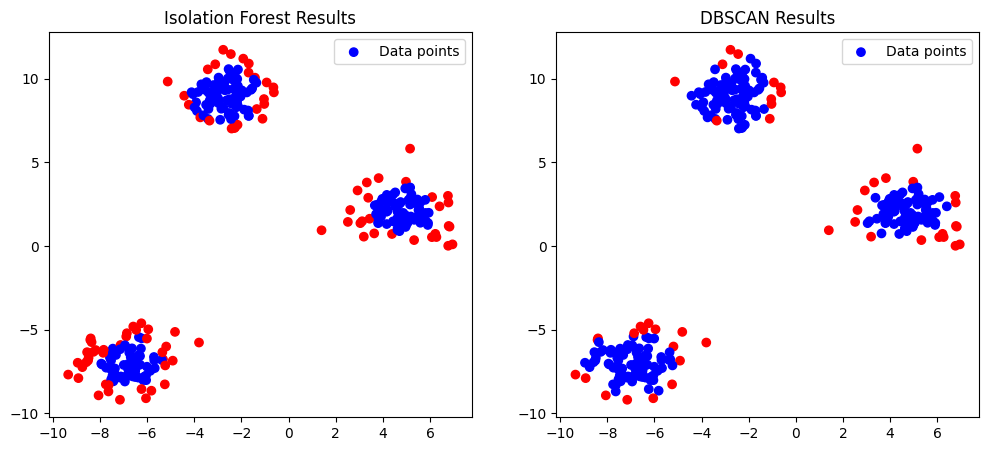

In [3]:
#create the data, variables, and then plot it
#remember that IF has contamination hyperparameter
#DBSCAN uses the eps area and minimum samples

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

#create the variables
iso_forest = IsolationForest(contamination=0.3, random_state=42)
y_pred_iso = iso_forest.fit_predict(X)

#dbscan
dsbcan = DBSCAN(eps=0.7, min_samples=10)
y_pred_dbscan = dsbcan.fit_predict(X)


#create the plots
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title("Isolation Forest Results")
plt.scatter(X[:, 0], X[:, 1], c=['red' if x == -1 else 'blue' for x in y_pred_iso], label="Data points")
plt.legend()

#create the dbscan
plt.subplot(1, 2, 2)
plt.title("DBSCAN Results")
plt.scatter(X[:, 0], X[:, 1], c=['red' if x == -1 else 'blue' for x in y_pred_dbscan], label="Data points")
plt.legend()

plt.show()

Let's test different contamination values

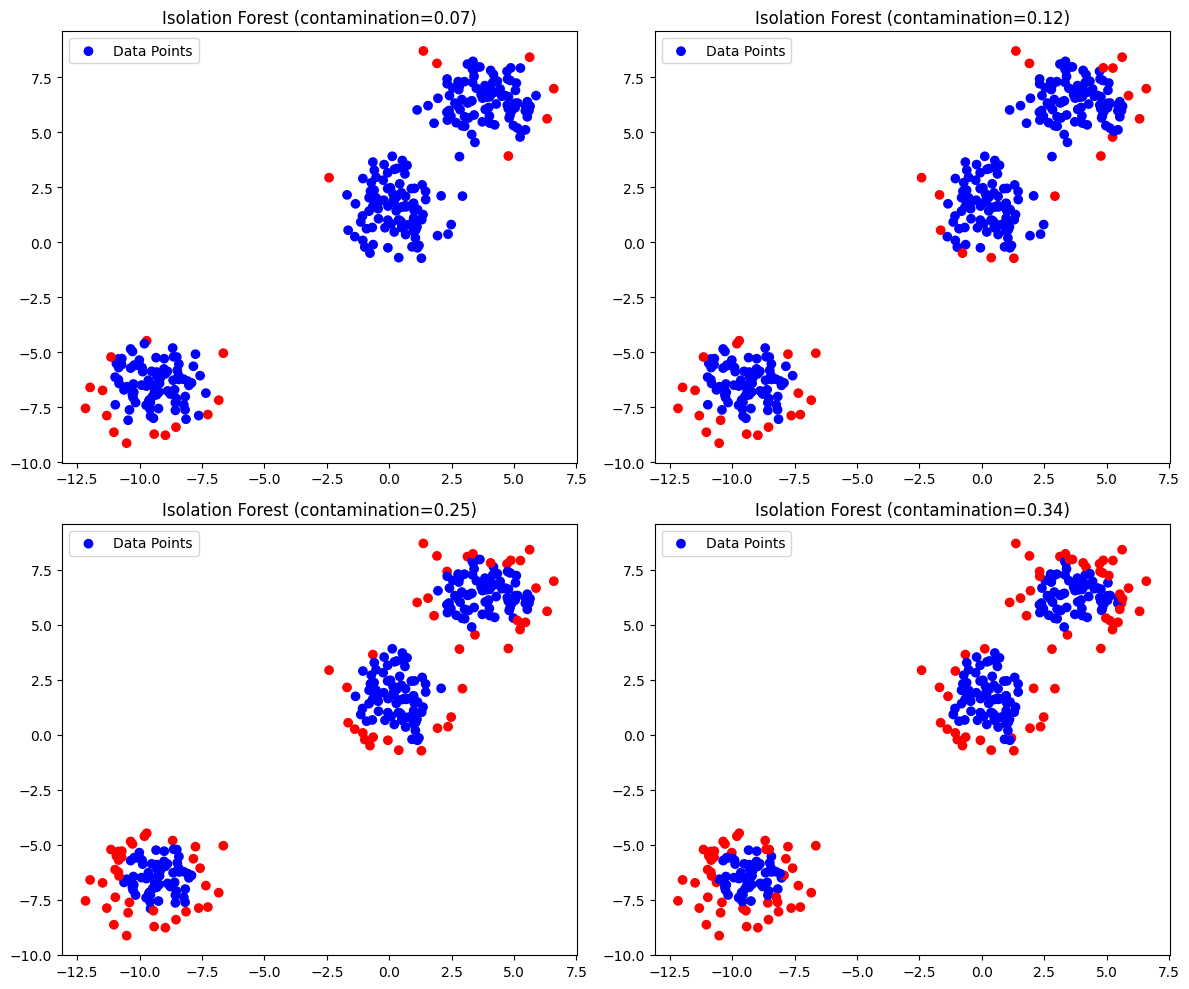

In [6]:
#make the same data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=101)

contamination_values = [0.07, 0.12, 0.25, 0.34]
plt.figure(figsize=(12, 10))

#varying contamination and plotting results
for i, contamination in enumerate(contamination_values, 1):
    iso_forest = IsolationForest(contamination=contamination, random_state=101)
    y_pred_iso = iso_forest.fit_predict(X)
    
    #create subplots
    plt.subplot(2, 2, i)
    plt.title(f"Isolation Forest (contamination={contamination})")
    plt.scatter(X[:, 0], X[:, 1], c=['red' if x == -1 else 'blue' for x in y_pred_iso], label="Data Points")
    plt.legend()
    
plt.tight_layout()
plt.show()

Now, let's try out a LOF model (Local Outlier Factor)


In [24]:
from sklearn.neighbors import LocalOutlierFactor

In [25]:
np.random.seed(101)

#cluster A: The dense cluster
cluster_a = np.random.normal(loc=[2, 2], scale=0.2, size=(100, 2))

#cluster b: The sparse cluster
cluster_b = np.random.normal(loc=[7, 7], scale=0.9, size=(100, 2))

#anomalies for cluster A
anomalies_a = np.array([[1.2, 2.2], [2.7, 1.1]])

#anomalies for cluster b
anomalies_b = np.array([[6.0, 8.5], [8.8, 6.3]])

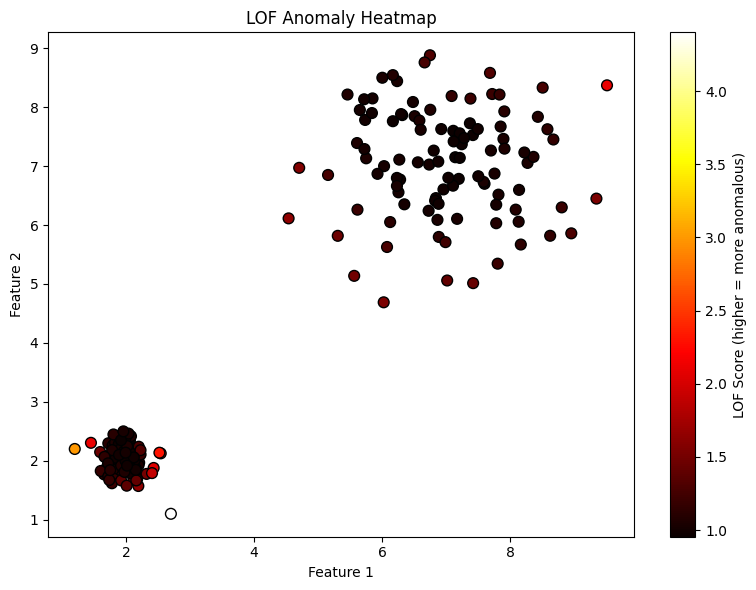

In [26]:
#Put all the data togther in 1 graph
X = np.vstack([cluster_a, cluster_b, anomalies_a, anomalies_b])

#fit the LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.02)
lof.fit(X)
#higher = more anomalies
lof_scores = -lof.negative_outlier_factor_

#plots
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=lof_scores, cmap='hot', s=60, edgecolors='k')
plt.colorbar(scatter, label='LOF Score (higher = more anomalous)')
plt.title('LOF Anomaly Heatmap')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

Now let's plot a heatmap for Isolation Forests and see the detected anomalies


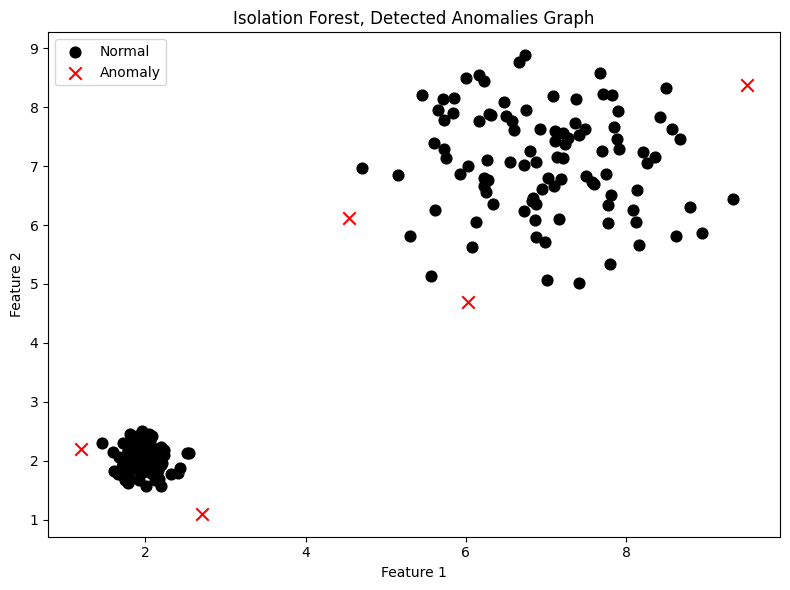

In [29]:
#we can use the same data fromt he previous examples
iso = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
y_pred = iso.fit_predict(X)

#anomalies will be plotted red here
plt.figure(figsize=(8, 6))
plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], c='black', label='Normal',s= 60)
plt.scatter(X[y_pred == -1][:, 0], X[y_pred == -1][:, 1], c='red', label='Anomaly',s= 80, marker='x')
plt.title('Isolation Forest, Detected Anomalies Graph')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

Here's a local outlier factor (LOF) example with varying n_neighbors


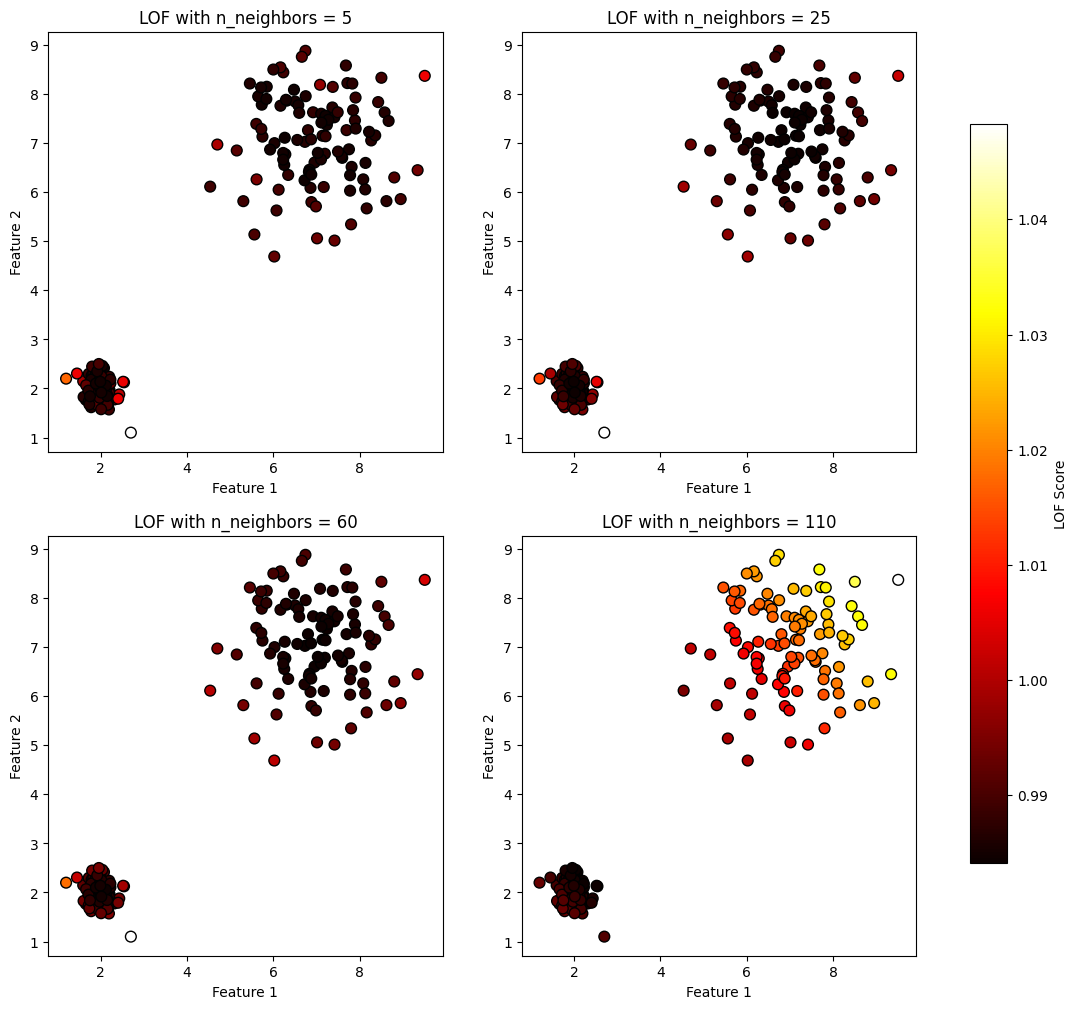

In [30]:
#use the same data from the previous cell
neighbor_settings = [5, 25, 60, 110]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

#enumerate the neighbor settings
for idx, n in enumerate(neighbor_settings):
    lof = LocalOutlierFactor(n_neighbors=n)
    lof.fit(X)
    lof_scores = -lof.negative_outlier_factor_
    sc = axes[idx].scatter(X[:, 0], X[:, 1], c=lof_scores, cmap='hot', s=60, edgecolors='k')
    axes[idx].set_title(f'LOF with n_neighbors = {n}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    
    
fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.8, label='LOF Score')
plt.show()

Finally, we can generate a dataset with a dense circular structure


In [33]:
#random seed to avoid generating different data all the time
np.random.seed(1)

#dense circular cluster
n_points = 100
#the angles for the radius ?
angles = np.linspace(0, 2 * np.pi, n_points, endpoint=False)
radius = 1.0 + np.random.normal(0, 0.05, n_points)
#create the x and y radius
x = radius * np.cos(angles)
y = radius * np.sin(angles)
cluster = np.column_stack((x, y))
#this will be the anomaly inside the cluster
anomaly = np.array([[0.3, 0.0]])
X = np.vstack([cluster, anomaly])

#create the log variable 
lof = LocalOutlierFactor(n_neighbors=10)
lof_pred = lof.fit_predict(X)

#use the default contamination auto(it will cause alot of misclassiifcations)
iso = IsolationForest(n_estimators=100, random_state=1)
iso_pred = iso.fit_predict(X)

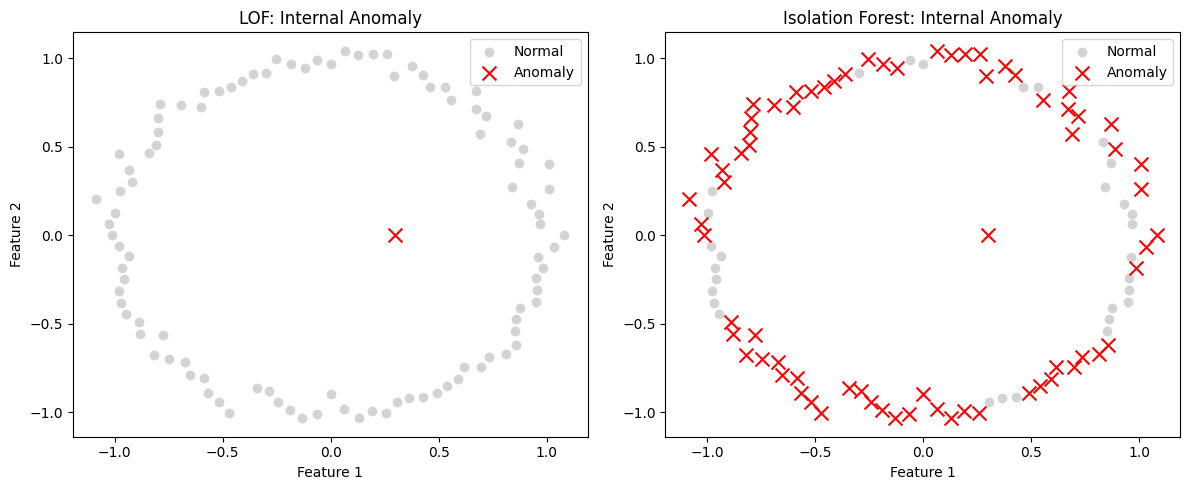

In [34]:
#plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# LOF
axes[0].scatter(X[lof_pred == 1][:, 0], X[lof_pred == 1][:, 1], c='lightgrey',  label='Normal')
axes[0].scatter(X[lof_pred == -1][:, 0], X[lof_pred == -1][:, 1], c='red',  label='Anomaly', marker='x', s=100)
axes[0].set_title('LOF: Internal Anomaly')
axes[0].legend()
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# isolation forest
axes[1].scatter(X[iso_pred == 1][:, 0], X[iso_pred == 1][:, 1], c='lightgrey',  label='Normal')
axes[1].scatter(X[iso_pred == -1][:, 0], X[iso_pred == -1][:, 1], c='red', label='Anomaly', marker='x', s=100)
axes[1].set_title('Isolation Forest: Internal Anomaly')
axes[1].legend()
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()